In [68]:
# Import libraries
import pandas as pd
import pandas.io.sql as sqlio
import sqlalchemy
import pprint
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine

In [69]:
# Use a txt file with the db info that has been .gitignored
text = open("connection.txt", "r").read()

# Use psycopg2 for connection because sqlalchemy was giving me headaches
conn = psycopg2.connect(text)

# Get the tables to do analysis for and test to make sure the data is coming through
titles_data = pd.read_sql("Select * FROM titles;", conn)
employees_data = pd.read_sql("Select * FROM employees;", conn)
departments_data = pd.read_sql("Select * FROM departments;", conn)
salaries_data = pd.read_sql("Select * FROM salaries;", conn)
dept_emp_data = pd.read_sql("Select * FROM dept_emp;", conn)
dept_manager_data = pd.read_sql("Select * FROM dept_manager;", conn)

titles_data[0:10]

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [70]:
employees_data[0:10]

,emp_no,emp_title_id,birth_data,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [71]:
departments_data[0:10]

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [72]:
salaries_data[0:10]

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [73]:
dept_emp_data[0:10]

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
5,10006,d005
6,10007,d008
7,10008,d005
8,10009,d006
9,10010,d004


In [74]:
dept_manager_data[0:10]

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183
5,d003,110228
6,d004,110303
7,d004,110344
8,d004,110386
9,d004,110420


In [75]:
# Merged pd df of employee and titles
titles_data = titles_data.rename(columns={"title_id": "emp_title_id", "title": "title"})
employees_to_titles = employees_data.merge(titles_data, on="emp_title_id")
employees_to_titles.head()

,emp_no,emp_title_id,birth_data,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff


In [76]:
#employee, titles and salaries
employees_titles_salaries = employees_to_titles.merge(salaries_data, on="emp_no")
employees_titles_salaries.head()

,emp_no,emp_title_id,birth_data,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


In [77]:
emp_salary_and_title_df = employees_titles_salaries[['emp_no', 'title', 'salary']]
emp_salary_and_title_df.head()

,emp_no,title,salary
0,473302,Staff,40000
1,421786,Staff,40000
2,273487,Staff,56087
3,246449,Staff,87084
4,48085,Staff,63016


In [78]:
# Employee statistics of houw much average each title makes
emp_statistics = emp_salary_and_title_df.groupby('title')['salary'].mean().round(2)
emp_statistics.head()

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Name: salary, dtype: float64

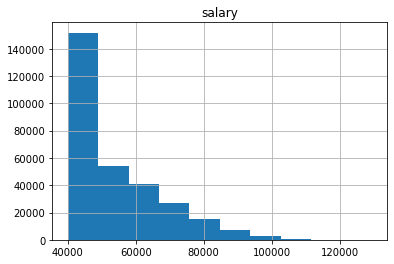

In [90]:
# Get histogram of all data for employees
emp_salary_and_title_df.hist(column = 'salary')
plt.savefig('../Images/Salary_Histogram')

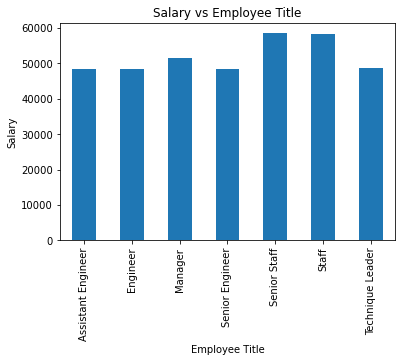

In [91]:
emp_statistics.plot.bar()
plt.title("Salary vs Employee Title")
plt.ylabel("Salary")
plt.xlabel("Employee Title")
plt.savefig('../Images/Salary_vs_EmpTitle')